<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculate-albedo" data-toc-modified-id="Calculate-albedo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculate albedo</a></span></li>


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from utility import analysis_parameters as ap, util
import numpy as np
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [2]:
region="TWP"

In [4]:
chunk_dict = {"time":500, "lat":400, "lon":1440} # "grid_size":500000} 
ds = xr.open_dataset(ap.get_twp_file("DATA", "rad"), chunks=chunk_dict)
da_olr = ds.adj_atmos_lw_up_all_toa_1h
da_swu = ds.adj_atmos_sw_up_all_toa_1h
da_swd = ds.adj_atmos_sw_down_all_toa_1h
ni_olr = xr.open_dataset(ap.get_twp_file("NICAM", "rlut"), chunks=chunk_dict).rlut
ni_swu = xr.open_dataset(ap.get_twp_file("NICAM", "rsut"), chunks=chunk_dict).rsut
ni_swd = xr.open_dataset(ap.get_twp_file("NICAM", "rsdt"), chunks=chunk_dict).rsdt
um_olr = xr.open_dataset(ap.get_twp_file("UM", "rlut"), chunks=chunk_dict).rlut
um_swu = xr.open_dataset(ap.get_twp_file("UM", "rsut"), chunks=chunk_dict).rsut
um_swd = xr.open_dataset(ap.get_twp_file("UM", "rsdt"), chunks=chunk_dict).rsdt
ge_olr = xr.open_dataset(ap.get_twp_file("GEOS", "rlut"), chunks=chunk_dict).rlut
ge_swu = xr.open_dataset(ap.get_twp_file("GEOS", "rsut"), chunks=chunk_dict).rsut
ge_swd = xr.open_dataset(ap.get_twp_file("GEOS", "rsdt"), chunks=chunk_dict).rsdt
sa_olr = xr.open_dataset(ap.get_twp_file("SAM", "rlt"), chunks=chunk_dict).rlt
sa_swn = xr.open_dataset(ap.get_twp_file("SAM", "rst"), chunks=chunk_dict).rstacc
sa_swd = xr.open_dataset(ap.get_twp_file("NICAM", "rsdt"), 
                         chunks=chunk_dict).rsdt.sel(time=sa_swn.time, 
                                                     lat=sa_swn.lat, 
                                                     lon=sa_swn.lon, 
                                                     method="nearest")
sa_swu = abs(sa_swd) - sa_swn.values
# sc_olr = xr.open_dataset(ap.get_twp_file("SCREAM", "rlt"), chunks=chunk_dict).rlt
# sc_swn = xr.open_dataset(ap.get_twp_file("SCREAM", "rst"), chunks=chunk_dict).rst
# sc_swd = xr.open_dataset(ap.get_twp_file("SCREAM", "rsdt"), chunks=chunk_dict).rsdt

sa_swu

[########################################] | 100% Completed |  5.0s


<xarray.DataArray 'rsdt' (time: 2976, lat: 256, lon: 256)>
dask.array<sub, shape=(2976, 256, 256), dtype=float32, chunksize=(500, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-28T23:45:00
  * lon      (lon) float64 143.0 143.0 143.1 143.1 ... 152.8 152.9 152.9 153.0
  * lat      (lat) float64 -4.975 -4.939 -4.904 -4.869 ... 4.904 4.939 4.975

# Coarsen to 1x1 deg

In [9]:
ni_olr = ni_olr.coarsen(lat=len(ni_olr.lat)//10, lon=len(ni_olr.lon)//10, boundary='trim').mean()
ni_swu = ni_swu.coarsen(lat=len(ni_swu.lat)//10, lon=len(ni_swu.lon)//10, boundary='trim').mean()
ni_swd = ni_swd.coarsen(lat=len(ni_swd.lat)//10, lon=len(ni_swd.lon)//10, boundary='trim').mean()
sa_olr = sa_olr.coarsen(lat=len(sa_olr.lat)//10, lon=len(sa_olr.lon)//10, boundary='trim').mean()
sa_swu = sa_swu.coarsen(lat=len(sa_swu.lat)//10, lon=len(sa_swu.lon)//10, boundary='trim').mean()
sa_swd = sa_swd.coarsen(lat=len(sa_swd.lat)//10, lon=len(sa_swd.lon)//10, boundary='trim').mean()
um_olr = um_olr.coarsen(latitude=len(um_olr.latitude)//10, longitude=len(um_olr.longitude)//10, boundary='trim').mean()
um_swu = um_swu.coarsen(latitude=len(um_swu.latitude)//10, longitude=len(um_swu.longitude)//10, boundary='trim').mean()
um_swd = um_swd.coarsen(latitude=len(um_swd.latitude)//10, longitude=len(um_swd.longitude)//10, boundary='trim').mean()
# ge_olr = ge_olr.coarsen(lat=len(ge_olr.lat)//10, lon=len(ge_olr.lon)//10, boundary='trim').mean()
# ge_swu = ge_swu.coarsen(lat=len(ge_swu.lat)//10, lon=len(ge_swu.lon)//10, boundary='trim').mean()
# ge_swd = ge_swd.coarsen(lat=len(ge_swd.lat)//10, lon=len(ge_swd.lon)//10, boundary='trim').mean()


# Calculate albedo


$ alb = \frac{sw_{up}}{sw_{down}} $ 

In [5]:
ni_alb = ni_swu/np.where(ni_swd>10, sni_wd, np.nan)
ni_alb = ni_swu/np.where(ni_swd>10, sni_wd, np.nan)
ni_alb = ni_swu/np.where(ni_swd>10, sni_wd, np.nan)
ni_alb = ni_swu/np.where(ni_swd>10, sni_wd, np.nan)
ni_alb = ni_swu/np.where(ni_swd>10, sni_wd, np.nan)
alb

[########################################] | 100% Completed | 34.5s
[########################################] | 100% Completed |  1.6s


<xarray.DataArray 'rsut' (time: 3253, Xdim: 97152)>
dask.array<truediv, shape=(3253, 97152), dtype=float32, chunksize=(656, 97152), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-03-03T21:00:00
    lons     (Xdim) float32 dask.array<chunksize=(97152,), meta=np.ndarray>
    lats     (Xdim) float32 dask.array<chunksize=(97152,), meta=np.ndarray>
Dimensions without coordinates: Xdim

In [6]:
alb.min().compute()

[########################################] | 100% Completed | 35.3s


<xarray.DataArray 'rsut' ()>
array(0.0352971, dtype=float32)

In [9]:
swu.shape, swd.shape, olr.shape

((3253, 97152), (3253, 97152), (384, 97152))

[########################################] | 100% Completed |  4.1s
[########################################] | 100% Completed |  2.6s


Exception: shapes of alb and olr don't match: (316035456,) != (37306368,)

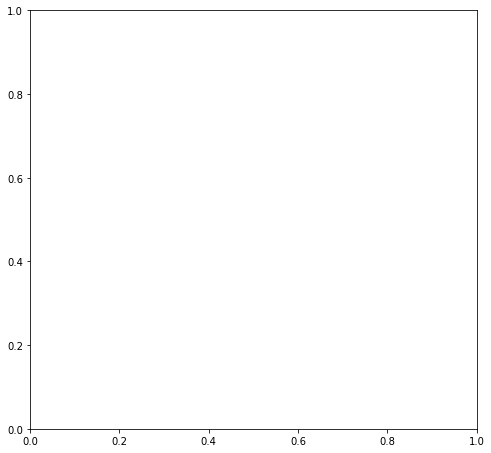

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,7.7))
# if model.lower()!="data":
olr = olr.where((olr.time.dt.hour>=0)&(olr.time.dt.hour<=4))
alb = alb.where((alb.time.dt.hour>=0)&(alb.time.dt.hour<=4))
util.dennisplot("density",olr.values.flatten(), alb.values.flatten(), 
                ax=ax, model=model, region=region, cmap="gist_earth_r")
# plt.xlabel("OLR (W/m2)")
# plt.ylabel("albedo")
# plt.grid(True)
if model.lower()=="data":
    model="CERES SYN1deg - 1h"
elif model.lower()=="sam":
    model="{} - using NICAM SWD - ".format(model)
# ax.set_ylim([0,0.8])
plt.title("{} {}\n01 Jan-1 Mar 2020 (10am-2pm LT)".format(model, region), fontsize=20)
plt.savefig("../plots/jhist_{}_{}.png".format(model.replace(" ",""), region))
plt.show()